# K-Means Clustering using kaggle dataset - performing Customer Segmentation

In [ ]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the dataset
cus_seg = pd.read_csv("/content/Live.csv")

In [ ]:
#EDA
cus_seg.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
#dropping unnecessary columns
cus_seg.drop(["Column1", "Column2", "Column3", "Column4"],axis=1, inplace=True)

In [ ]:
cus_seg.shape

(7050, 12)

In [ ]:
cus_seg.dtypes

,0
status_id,object
status_type,object
status_published,object
num_reactions,int64
num_comments,int64
num_shares,int64
num_likes,int64
num_loves,int64
num_wows,int64
num_hahas,int64


In [ ]:
#check missing values
cus_seg.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
cus_seg.isna().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
#check frequency distribution
for col in cus_seg.columns:
  print(cus_seg[col].value_counts())

status_id
819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: count, Length: 6997, dtype: int64
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64
status_published
3/20/2018 1:54     3
12/28/2017 8:09    2
4/30/2018 6:20     2
4/26/2018 19:00    2
4/23/2018 7:26     2
                  ..
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/7/2012 0:21      1
9/10/2016 10:30    1
Name: count, Length: 6913, dtype: int64
num_reactions
1       131
2       124
14      121
0       121
3       116
       ... 
2826      1
2032      1
2154      1
1997      1
4

In [ ]:
#summary of dataset
cus_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [ ]:
#check if any categorical variable can be used
len(cus_seg['status_id'].unique())

6997

In [ ]:
len(cus_seg['status_published'].unique())

6913

In [ ]:
len(cus_seg['status_type'].unique())

4

In [ ]:
#dropping other two categorical variable - status_id, status_published
cus_seg.drop(["status_id", "status_published"], axis=1, inplace=True)

In [ ]:
cus_seg.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
#Pre-processing

X = cus_seg
y = cus_seg["status_type"]

In [ ]:
#encode - using labelencoder because of even spaced status_type column

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X['status_type'] = enc.fit_transform(X['status_type'])
y = enc.transform(y)

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [ ]:
X.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [ ]:
#as scaling ruins the alignment and converts to numpy array of the dataset
cols = X.columns

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X = scale.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
#implement the model

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

### initially used Z-score normalisation, which hurt the model so switched to Min-Max normalisation.

In [ ]:
# check inertia - lesser the model inertia, the better the model fit
kmeans.inertia_

178.66340039279473

In [ ]:
# check how weak it is
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4066 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58


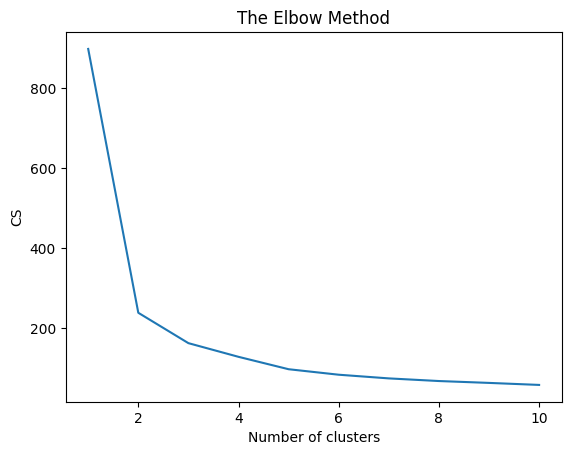

In [ ]:
#to find optimal value for k-clusters

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
# changing k-value or cluster value to see how the model is performing
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.inertia_

130.33380990427332

In [ ]:
labels = kmeans.labels_

correct_labels = sum(y==labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4112 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [ ]:
kmeans.inertia_

89.04010577824718

In [ ]:
labels = kmeans.labels_

correct_labels = sum(y==labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4014 out of 7050 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.57


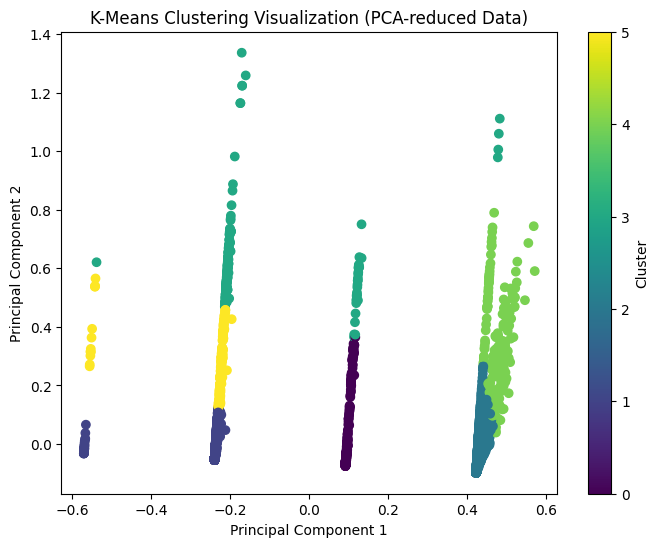

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)  # X is the scaled data

# Step 2: Visualize the clusters with K-Means labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')  # Using K-Means cluster labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization (PCA-reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

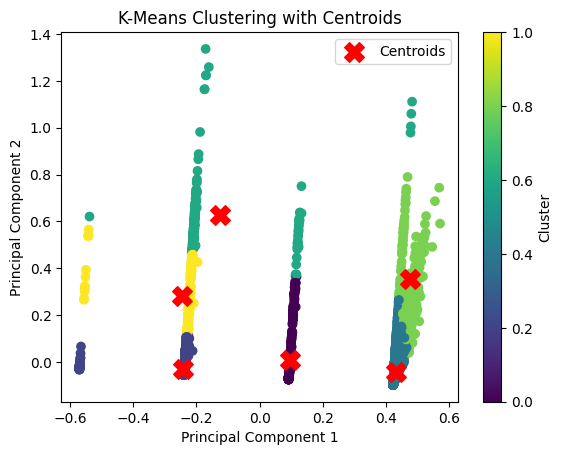

In [ ]:
# Step 3: Plotting the centroids
centroids = kmeans.cluster_centers_

# Transform the centroids using PCA (same as done for the data)
centroids_pca = pca.transform(centroids)

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()